# Task 1: Heart and Abdominal using SVM and CNN Models Repectively.

In [1]:
#Loading the data set as a numpy array.
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
resize_width = 128
resize_height = 128
path = 'C:\Hcmm507\School\CMM536\data_cww\data'
images = [] # List to append the images as 2D numpy arrays.
target = [] # List to append the target
originalrepo = [] # Create a repo for flattened pixels

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height)) 
                images.append(img)
                # Append the flattened image to the pixel repo
                originalrepo.append(img.flatten())
                # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
originalrepo = np.array(originalrepo) 
print(originalrepo)
print(target)

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [ 0  0  0 ...  1  1  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
['Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal', 'Abdominal'

The heart and abdominal data were tranfered to one folder.
This code reads images, resizes them, and stores them along with their corresponding folder names in separate lists. It also flattens the resized images into 1D arrays and adds them to another list. Finally, it converts this list of flattened images into a numpy array and prints both the array and the list of folder names.

In [2]:
images = np.array(images)
images_normalized = images / 255.0
print(images_normalized)

[[[0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  ...
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]]

 [[0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  ...
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]]

 [[0.03921569 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]
  [0.03921569 0.039215

The code above  is normalizing the images by dividing by 255 scales pixel values to a range [0, 1], aiding gradient-based optimization in machine learning.

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

After importation of the various packages for the training of the model for the non-neural network, we then have to seperare the data into training and testing.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(originalrepo, target, test_size=0.2, random_state=42)
print("Number training set in data:", len(x_train))
print("Number testing set in data:", len(x_test))

Number training set in data: 914
Number testing set in data: 229


The above code shows the amount of data after been seperated into training and testing sets.

# SVM MODEL

In [5]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train.reshape(len(x_train), -1), y_train)
svm_predictions = svm_classifier.predict(x_test.reshape(len(x_test), -1))
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM accuracy is:", svm_accuracy)

SVM accuracy is: 1.0


This part of the code creates a support vector machine (SVM) classifier using a linear kernel. Alos, it trains the classifier using training data (x_train) and the corresponding labels (y_train). After training, it predicts labels for the test data (x_test) using the trained classifier. Next, it calculates the accuracy of the predictions by comparing them to the actual labels (y_test).

In [6]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear')
clf_svm = model_svm.fit(x_train,y_train)
y_svm = model_svm.predict(x_test)
print(y_svm,y_svm.shape)

['Abdominal' 'Heart' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal'
 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Heart'
 'Abdominal' 'Abdominal' 'Heart' 'Abdominal' 'Abdominal' 'Abdominal'
 'Heart' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Heart'
 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal'
 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal'
 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal'
 'Abdominal' 'Heart' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal'
 'Abdominal' 'Heart' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal'
 'Abdominal' 'Abdominal' 'Abdominal' 'Heart' 'Abdominal' 'Abdominal'
 'Abdominal' 'Abdominal' 'Abdominal' 'Heart' 'Abdominal' 'Abdominal'
 'Abdominal' 'Heart' 'Abdominal' 'Heart' 'Abdominal' 'Abdominal' 'Heart'
 'Abdominal' 'Abdominal' 'Abdominal' 'Heart' 'Abdominal' 'Heart'
 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Abdominal' 'Heart'
 'Abdominal' 'Heart' 'Abdo

This code trains a Support Vector Machine (SVM) classifier with a linear kernel on training data (x_train, y_train), predicts labels for test data (x_test), and prints the predicted labels along with their shape.

In [7]:
from sklearn.metrics import precision_recall_fscore_support
svm_predictions = svm_classifier.predict(x_test)
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_predictions, average='binary', pos_label='Heart')
print("SVM Classifier:")
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

SVM Classifier:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [8]:
from sklearn.model_selection import cross_val_score

clf_svm = SVC(kernel='linear')

# Perform 5-fold cross-validation
scores = cross_val_score(clf_svm, originalrepo, target, cv=5)

# Print the mean accuracy across all folds
print("Mean Accuracy:", scores.mean())

Mean Accuracy: 1.0


# CNN MODEL

We are going to be using the same data importation code for this model so we wont be having any data importantion code.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [10]:
#The code below help normalize labels, especially useful for converting categorical labels into numerical format.
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [11]:
target_onehot = to_categorical(target_encoded)

The code encodes categorical target labels into numerical representations using LabelEncoder, then converts them into one-hot encoded vectors, preparing them for machine learning tasks.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(originalrepo, target_onehot, test_size=0.2, random_state=42)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

For the CNN model, the above code split the data into testing and training sets which would be used to train the model so  it could arruratly predict.

In [13]:
#Building the CNN model but first we have to import our model tools.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(resize_width, resize_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

This code defines a convolutional neural network (CNN) model using the Keras Sequential API. It consists of multiple layers: convolutional layers (Conv2D) followed by max pooling layers (MaxPooling2D) for feature extraction, followed by a flattening layer to convert the 2D feature maps into a 1D vector. Then, it has two dense layers (Dense) for classification, with the last layer using softmax activation for multiclass classification

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

the summary gives a clear view of how our neural network is built. It shows each layer's type, output size, and the number of parameters it has. This helps us understand our model better and verify if it's set up correctly.

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

This line compiles the neural network model for training. It specifies the optimizer (Adam), the loss function (categorical crossentropy), and the metrics to evaluate the model's performance during training (accuracy).

In [17]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


29/29 [==============================] - 9s 247ms/step - loss: 0.0394 - accuracy: 0.9869 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
29/29 [==============================] - 7s 241ms/step - loss: 6.5213e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
29/29 [==============================] - 7s 227ms/step - loss: 1.3043e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
29/29 [==============================] - 7s 231ms/step - loss: 1.3043e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
29/29 [==============================] - 7s 251ms/step - loss: 1.3043e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


This line trains the neural network model using the training data for 5 rounds (epochs), with batches of 32 samples each time. It also checks how well the model performs on the test data after each epoch and records the training progress and performance metrics.

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

8/8 [==============================] - 1s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 1.0


From the above training data, the model achieved a 100 percent accuracy so to be sure, we ran a test loss accuracy and it turns out to be that the accuracy is correct.

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: ', loss,'\nAcc: ', accuracy)

8/8 [==============================] - 1s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss:  0.0 
Acc:  1.0


the code above calculates the loss and accuracy of the model on the test set

In [20]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report

true_labels_encoded = np.argmax(y_test, axis=1)
true_labels = label_encoder.inverse_transform(true_labels_encoded)

predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

print("True Label\tPredicted Label")
for true_label, predicted_label in zip(true_labels, predicted_labels):
    print(f"{true_label}\t\t{predicted_label}")

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

8/8 [==============================] - 1s 54ms/step
True Label	Predicted Label
Abdominal		Abdominal
Heart		Heart
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Heart		Heart
Abdominal		Abdominal
Abdominal		Abdominal
Heart		Heart
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Heart		Heart
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Heart		Heart
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Abdominal		Abdominal
Heart		Heart
Abdominal		Abdominal
Abdominal		Abdominal
Abd

The code above shows us the output of the original label compared to the predicted label.

8/8 [==============================] - 1s 53ms/step


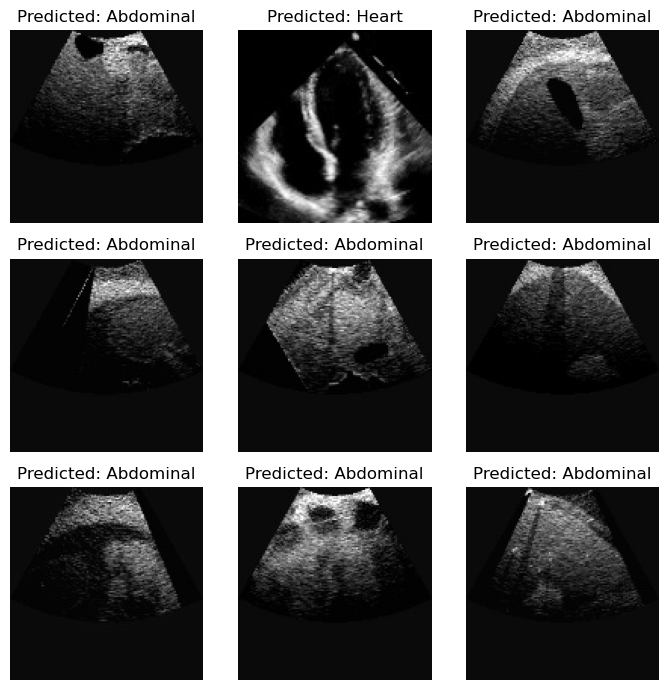

In [21]:
predictions = model.predict(X_test)

predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

label_to_class = {i: label for i, label in enumerate(label_encoder.classes_)}

fig, axes = plt.subplots(3, 3, figsize=(7, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(resize_width, resize_height), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

This code displays random pictures in the given data and the predicted label.

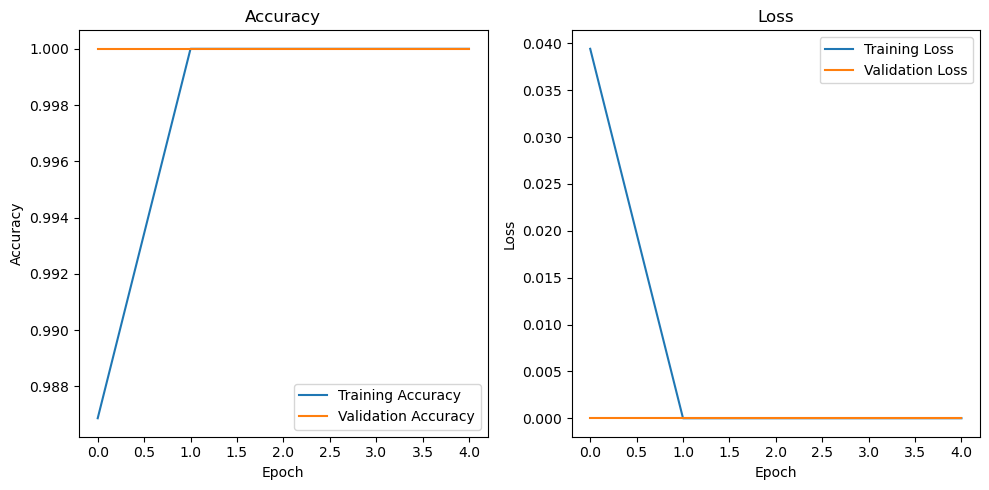

In [22]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

This code plots the training and validation accuracy as well as the training and validation loss over the epochs. It helps visualize how well the model is learning from the training data and generalizing to unseen data. The left subplot shows the accuracy, while the right subplot displays the loss.

# Cross Validation

In [23]:
target = np.array(target)

In [24]:
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits = 5)
kf.get_n_splits(originalrepo)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [26]:
i = 1
for train_index, test_index in kf.split(originalrepo):
    print('\nfold '+str(i)+':')
    print('TRAIN INDEXES:', train_index)
    print('TEST INDEXES:', test_index)
    X_train, X_test = originalrepo[train_index], originalrepo[test_index]
    y_train, y_test = target[train_index],  target[test_index]
    i+=1


fold 1:
TRAIN INDEXES: [ 229  230  231  232  233  234  235  236  237  238  239  240  241  242
  243  244  245  246  247  248  249  250  251  252  253  254  255  256
  257  258  259  260  261  262  263  264  265  266  267  268  269  270
  271  272  273  274  275  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  318  319  320  321  322  323  324  325  326
  327  328  329  330  331  332  333  334  335  336  337  338  339  340
  341  342  343  344  345  346  347  348  349  350  351  352  353  354
  355  356  357  358  359  360  361  362  363  364  365  366  367  368
  369  370  371  372  373  374  375  376  377  378  379  380  381  382
  383  384  385  386  387  388  389  390  391  392  393  394  395  396
  397  398  399  400  401  402  403  404  405  406  407  408  409  410
  411  412  413  414  415  416  417  418  419  420  4

This code performs k-fold cross-validation, splitting the dataset into 5 folds. It then iterates through each fold, printing the indexes of the training and test sets for each fold. For each iteration, it assigns the data according to the indexes to X_train, X_test, y_train, and y_test. This process helps evaluate the model's performance more robustly by training and testing it on different subsets of the data.

In [27]:
from sklearn.model_selection import StratifiedKFold
kf_strat = StratifiedKFold(n_splits=5)
kf_strat.get_n_splits(originalrepo, target)
print(kf_strat)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


the cell below to implements the stratified version of KFolds

In [28]:
# Cross validatig the original data (the function will do it all)
from sklearn.model_selection import cross_validate

scores_svm = cross_validate(model_svm, originalrepo, target, cv=5)
print('SVM cross-validated scores: ', scores_svm)

SVM cross-validated scores:  {'fit_time': array([1.87717104, 0.58895183, 0.50010586, 0.46022892, 0.43104029]), 'score_time': array([0.10511112, 0.05664873, 0.03832841, 0.04804897, 0.02886486]), 'test_score': array([1., 1., 1., 1., 1.])}


This code evaluates the performance of the Support Vector Machine using cross-validation. It splits the data into 5 parts, trains and tests the model on each part separately, and then prints out the evaluation scores for each fold. This process helps understand how well the model performs across different parts of the dataset.

In [29]:
# First we import cross_val_scores
from sklearn.model_selection import cross_val_score

In [30]:
# Evaluating Accuracy for each fold
print('Accuracy for SVM: ',cross_val_score(model_svm, originalrepo, target, cv=5, scoring = 'accuracy'))

Accuracy for SVM:  [1. 1. 1. 1. 1.]


In [31]:
# Evaluating Mean Accuracy for all folds
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(model_svm, originalrepo, target, cv=5, scoring = 'accuracy')))

Mean Accuracy for SVM:  1.0


When coming to a conclusion on the best model, the main factors should be how much data are we working with. in this case, the data for both heart and non- heart are little aiding the accurate prediction from both of the models.
Support Vector Machines (SVMs) exhibit robustness in binary and multi-class classification tasks, especially when the number of features is relatively small compared to the sample size.Conversely, Convolutional Neural Networks.
To summarize, when undertaking tasks related to image classification or those involving intricate patterns within high-dimensional data, i would say that CNNs are likely the superior choice.

# Task 2: Open and Closed Heart using CNN Model

Using the CNN model from the first example to run for the prediction of open and close heart.

In [32]:
#We have to import a new data set than that from the last one because this time, something different is been looked at.
resize_width = 128
resize_height = 128
path = 'C:\Hcmm507\School\CMM536\data_cw\data\heart'
Images = [] # List to append the images as 2D numpy arrays.
target = [] # List to append the target
Originalrepo = [] # Create a repo for flattened pixels

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                Img = cv2.imread(root+'/'+file, 0)
                Img = cv2.resize(Img, (resize_width, resize_height)) 
                Images.append(Img)
                # Append the flattened image to the pixel repo
                Originalrepo.append(Img.flatten())
                # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
Originalrepo = np.array(Originalrepo) 
print(Originalrepo)
print(target)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]]
['closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',

In [33]:
len(Originalrepo)

218

In [34]:
Images = np.array(Images)
Images_normalized = Images / 255.0
print(Images_normalized)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [35]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [36]:
target_onehot = to_categorical(target_encoded)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(Originalrepo, target_onehot, test_size=0.2, random_state=42)

In [38]:
print("Number of samples in training set:", len(X_train))
print("Number of samples in testing set:", len(X_test))

Number of samples in training set: 174
Number of samples in testing set: 44


In [39]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [40]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

In [41]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(resize_width, resize_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/5
6/6 [==============================] - 3s 304ms/step - loss: 0.7169 - accuracy: 0.5345 - val_loss: 0.6301 - val_accuracy: 0.7727
Epoch 2/5
6/6 [==============================] - 1s 241ms/step - loss: 0.6299 - accuracy: 0.6322 - val_loss: 0.5159 - val_accuracy: 0.7045
Epoch 3/5
6/6 [==============================] - 1s 220ms/step - loss: 0.5230 - accuracy: 0.7874 - val_loss: 0.3659 - val_accuracy: 0.8409
Epoch 4/5
6/6 [==============================] - 1s 217ms/step - loss: 0.2986 - accuracy: 0.8908 - val_loss: 0.2310 - val_accuracy: 0.9318
Epoch 5/5
6/6 [==============================] - 1s 218ms/step - loss: 0.1967 - accuracy: 0.9310 - val_loss: 0.2608 - val_accuracy: 0.9091


In [45]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_acc)

2/2 [==============================] - 0s 38ms/step - loss: 0.2608 - accuracy: 0.9091
Test Accuracy: 0.9090909361839294


In [46]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Loss: ', loss,'\nAcc: ', accuracy)

2/2 [==============================] - 0s 27ms/step - loss: 0.2608 - accuracy: 0.9091
Loss:  0.2607782185077667 
Acc:  0.9090909361839294


In [47]:
#Code predicts test labels, compares them with true labels, and displays performance metrics summary
predictions = model.predict(X_test)

true_labels_encoded = np.argmax(Y_test, axis=1)
true_labels = label_encoder.inverse_transform(true_labels_encoded)

predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

print("True Label\tPredicted Label")
for true_label, predicted_label in zip(true_labels, predicted_labels):
    print(f"{true_label}\t\t{predicted_label}")

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

2/2 [==============================] - 0s 27ms/step
True Label	Predicted Label
open		open
open		open
open		open
open		open
closed		closed
open		open
open		open
closed		closed
open		open
open		open
open		open
closed		closed
open		open
closed		closed
closed		open
open		open
open		open
closed		closed
open		open
closed		closed
open		open
open		open
closed		closed
closed		closed
open		closed
open		open
open		open
closed		closed
closed		open
open		open
open		closed
closed		closed
open		open
open		open
open		open
open		open
closed		closed
open		open
open		open
open		open
open		open
open		open
open		open
open		open

Classification Report:
              precision    recall  f1-score   support

      closed       0.85      0.85      0.85        13
        open       0.94      0.94      0.94        31

    accuracy                           0.91        44
   macro avg       0.89      0.89      0.89        44
weighted avg       0.91      0.91      0.91        44



2/2 [==============================] - 0s 37ms/step


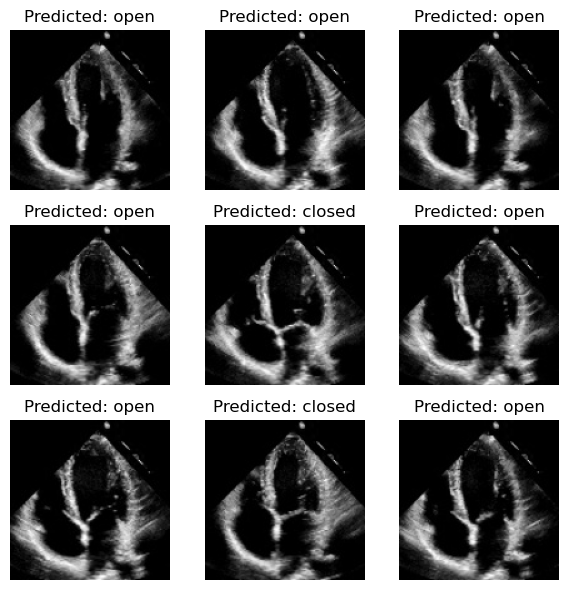

In [48]:
predictions = model.predict(X_test)

predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

label_to_class = {i: label for i, label in enumerate(label_encoder.classes_)}

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(resize_width, resize_height), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

2/2 [==============================] - 0s 40ms/step

Classification Report:
              precision    recall  f1-score   support

      closed       0.85      0.85      0.85        13
        open       0.94      0.94      0.94        31

    accuracy                           0.91        44
   macro avg       0.89      0.89      0.89        44
weighted avg       0.91      0.91      0.91        44



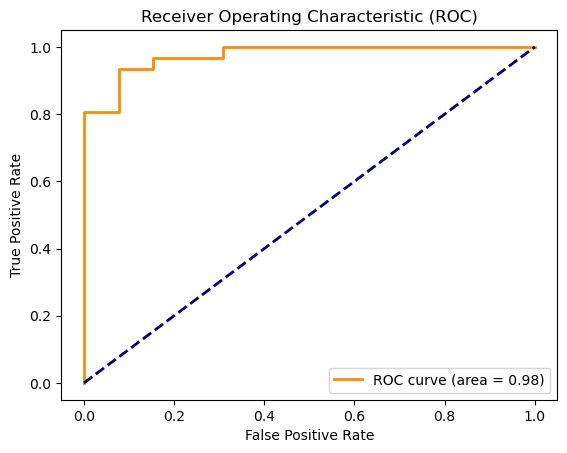


Confusion Matrix:
[[11  2]
 [ 2 29]]


In [49]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

predictions = model.predict(X_test)


true_labels_encoded = np.argmax(Y_test, axis=1)
true_labels = label_encoder.inverse_transform(true_labels_encoded)

predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

fpr, tpr, _ = roc_curve(true_labels_encoded, predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

In the realm of medical image analysis, the classification of heart images depicting open and closed valves presents a formidable challenge due to nuanced similarities among images and limited data availability. Despite these obstacles, employing convolutional neural networks (CNNs) demonstrates promise in achieving robust classification. Leveraging a dataset comprising 218 images capturing variations in cardiac configurations, the CNN model exhibits commendable performance during training, accurately predicting the majority of instances. However, two instances within the training set remain misclassified, attributed to subtle differentiations and near-open or near-closed states of the depicted hearts. 

# Task 3: Result improvment using Transfer Learning(VGG16)

In [50]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [51]:
target_onehot = to_categorical(target_encoded)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(Originalrepo, target_onehot, test_size=0.3, random_state=42)

In [53]:
print("Number of samples in training set:", len(X_train))
print("Number of samples in testing set:", len(X_test))

Number of samples in training set: 152
Number of samples in testing set: 66


In [54]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [55]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

In [56]:
from tensorflow.keras.applications import VGG16

The provided code below defines a U-Net architecture with VGG16 as its backbone for image segmentation. It consists of an encoder-decoder structure with skip connections, utilizing convolutional and upsampling layers to generate segmentation masks (Maynard-Reid 2022), (ANDRII 2023).

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, Concatenate, Input

# inputs
inputs = Input(shape=(128, 128, 1))

# encoder: contracting path - downsample
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)

conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D((2, 2))(drop4)

# Bottom/Center
conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
drop5 = Dropout(0.5)(conv5)

# decoder: expanding path - upsample
up6 = Conv2D(512, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(drop5))
merge6 = Concatenate(axis=3)([drop4, up6])
conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

up7 = Conv2D(256, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(conv6))
merge7 = Concatenate(axis=3)([conv3, up7])
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

up8 = Conv2D(128, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(conv7))
merge8 = Concatenate(axis=3)([conv2, up8])
conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

up9 = Conv2D(64, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(conv8))
merge9 = Concatenate(axis=3)([conv1, up9])
conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

# Outputs
outputs = Conv2D(3, (1, 1), activation='softmax')(conv9)

# Define the model
vgg16_unet = Model(inputs=[inputs], outputs=[outputs])

In [58]:
vgg16_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d_6[0][0]']            
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)           0         ['conv2d_7[0][0]']            
 g2D)                                                                                         

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/5
5/5 [==============================] - 3s 322ms/step - loss: 0.3288 - accuracy: 0.8750 - val_loss: 0.3532 - val_accuracy: 0.7879
Epoch 2/5
5/5 [==============================] - 1s 245ms/step - loss: 0.3115 - accuracy: 0.8816 - val_loss: 0.1851 - val_accuracy: 0.9545
Epoch 3/5
5/5 [==============================] - 1s 242ms/step - loss: 0.1920 - accuracy: 0.9408 - val_loss: 0.1715 - val_accuracy: 0.9545
Epoch 4/5
5/5 [==============================] - 1s 244ms/step - loss: 0.1447 - accuracy: 0.9539 - val_loss: 0.1672 - val_accuracy: 0.9545
Epoch 5/5
5/5 [==============================] - 1s 247ms/step - loss: 0.1142 - accuracy: 0.9671 - val_loss: 0.1860 - val_accuracy: 0.9545


In [61]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_acc)

3/3 [==============================] - 0s 39ms/step - loss: 0.1860 - accuracy: 0.9545
Test Accuracy: 0.9545454382896423


In [62]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Loss: ', loss,'\nAcc: ', accuracy)

3/3 [==============================] - 0s 42ms/step - loss: 0.1860 - accuracy: 0.9545
Loss:  0.185996413230896 
Acc:  0.9545454382896423


In [63]:
#Code predicts test labels, compares them with true labels, and displays performance metrics summary
predictions = model.predict(X_test)

true_labels_encoded = np.argmax(Y_test, axis=1)
true_labels = label_encoder.inverse_transform(true_labels_encoded)

predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

print("True Label\tPredicted Label")
for true_label, predicted_label in zip(true_labels, predicted_labels):
    print(f"{true_label}\t\t{predicted_label}")

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

3/3 [==============================] - 0s 38ms/step
True Label	Predicted Label
open		open
open		open
open		open
open		open
closed		closed
open		open
open		open
closed		closed
open		open
open		open
open		open
closed		closed
open		open
closed		closed
closed		open
open		open
open		open
closed		closed
open		open
closed		closed
open		open
open		open
closed		closed
closed		closed
open		closed
open		open
open		open
closed		closed
closed		closed
open		open
open		closed
closed		closed
open		open
open		open
open		open
open		open
closed		closed
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
open		open
closed		closed
closed		closed
open		open
open		open
closed		closed
closed		closed
closed		closed
open		open
closed		closed
closed		closed
closed		closed
open		open
closed		closed
open		open
open		open

Classification Report:
              precision    recall  f1-score   support

      closed       0.91   

3/3 [==============================] - 0s 41ms/step


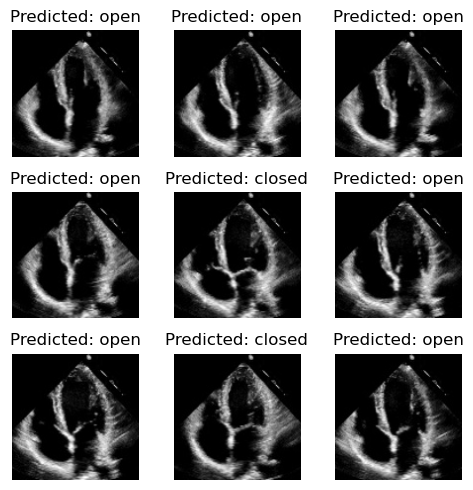

In [64]:
predictions = model.predict(X_test)

predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

label_to_class = {i: label for i, label in enumerate(label_encoder.classes_)}

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(resize_width, resize_height), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Several factors contribute to the slight improvement reported between the CNN and U-Net architecture with VGG16 models in identifying the open and closed heart datasets. The dataset's small size limits affects the U-Net architecture with VGG16's capacity to extract considerably unique patterns, despite its pre-trained 16 layers optimised for large datasets. As a result, the incremental benefits of using VGG16's deep architecture are minimised. Given the dataset's small size, any model's ability to detect detailed patterns for improved classification efficacy is limited.

References

ANDRII MAKARENKO, 2023. Boost Your Image Classification Model with pretrained VGG-16.

MAYNARD-REID MARGARET, 2022. U-Net Image Segmentation in Keras. [online]. Available from: https://pyimagesearch.com/2022/02/21/u-net-image-segmentation-in-keras/2024].

In [65]:
import io
from nbformat import current

filepath = 'Eme Ndukwe (2329274) CMM536 COURSEWORK MAIN.ipynb' #this is the name of your coursework file!

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'ipynb')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

1090


C:\Users\ndukw\AppData\Local\Temp\ipykernel_36156\2002665475.py:2: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current
